# Маркетинговое исследование Procrastinate Pro+

**Цель:** на основе данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года, провести маркетинговое исследование приложения Procrastinate Pro+ и выявить причины убыточности для дальнейшего вывода компании в положительную прибыль

**Задачи:**
- выявить, откуда приходят пользователи и какими устройствами они пользуются;
- определить стоимость привлечения пользователей из различных рекламных каналов;
- рассчитать, сколько денег приносит каждый клиент;
- проверить, когда расходы на привлечение клиента окупаются;
- определить, какие факторы мешают привлечению клиентов.

### Содержание

1. [Изучение и подготовка данных к анализу](#1id)
2. [Функции для расчета и анализа LTV, ROI, удержания и конверсии](#2id)
    * [Функция для создания пользовательских профилей: get_profiles()](#2.1id)
    * [Функция для расчёта удержания: get_retention()](#2.2id)
    * [Функция для расчёта конверсии: get_conversion()](#2.3id)
    * [Функция для расчёта LTV и ROI: get_ltv()](#2.4id)
    * [Функция для сглаживания фрейма: filter_data()](#2.5id)
    * [Функция для визуализации удержания: plot_retention()](#2.6id)
    * [Функция для визуализации конверсии: plot_conversion()](#2.7id)
    * [Функция для визуализации LTV и ROI: plot_ltv_roi()](#2.8id)
3. [Исследовательский анализ данных](#3id)
    * [Создание профилей клиентов](#3.1id)
    * [Распределение пользователей по странам](#3.2id)
    * [Распределение по устройствам](#3.3id)
    * [Распределение по рекламным каналам](#3.4id)
4. [Маркетинг](#4id)
    * [Расходы на маркетинг](#4.1id)
    * [Рассчет CAC](#4.2id)
5. [Оценка окупаемости рекламы](#5id)
    * [Общая окупаемость рекламы](#5.1id)
    * [Oкупаемость рекламы с разбивкой по рекламным каналам](#5.2id)
    * [Окупаемость рекламы с разбивкой по странам](#5.3id)
    * [Окупаемость рекламы с разбивкой по устройствам](#5.4id)
    * [Анализ конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам](#5.5id)
6. [Выводы](#6id)
    * [Причины неэффективности привлечения пользователей](#6.1id)
    * [Рекомендации для отдела маркетинга](#6.2id)

### 1. Изучение и подготовка данных к анализу <a id="1id"></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    
except:
    visits = pd.read_csv('/home/olga/Downloads/visits_info_short.csv')
    orders = pd.read_csv('/home/olga/Downloads/orders_info_short.csv')
    costs = pd.read_csv('/home/olga/Downloads/costs_info_short.csv')

Проверим каждый датафрейм. Создадим функцию, которая:
- выведет общую информацию
- посчитает количество дубликатов
- посчитает количество значений по каждому столбцу
- заменит пропуски в названиях столбцов
- приведет названия столбцов к нижнему регистру
- преобразует данные времени

In [3]:
def inspect(df):
    display(df.head()) 
    df.info()
    print()
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print('*'*50)
    return df

### Таблица "visits"

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

In [4]:
visits = inspect(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Количество дубликатов - 0


33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

**************************************************


United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

**************************************************


iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

**************************************************


organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

**************************************************


### Таблица "orders"

- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

In [5]:
orders = inspect(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Количество дубликатов - 0


901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

**************************************************


4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

**************************************************


### Таблица "costs"

- `channel` — идентификатор рекламного источника,
- `Dt` — дата проведения рекламной кампании,
- `Costs` — расходы на эту кампанию.

In [6]:
costs = inspect(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Количество дубликатов - 0


WahooNetBanner        180
lambdaMediaAds        180
TipTop                180
AdNonSense            180
MediaTornado          180
FaceBoom              180
RocketSuperAds        180
YRabbit               180
LeapBob               180
OppleCreativeMedia    180
Name: channel, dtype: int64

**************************************************


In [7]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии <a id="2id"></a>

Зададим функции для создания пользовательских профилей, расчёта удержания, конверсии, пожизненной ценности клиента, а также окупаемости инвестиций.

### 2.1 Функция для создания пользовательских профилей: get_profiles() <a id="2.1id"></a>

In [8]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### 2.2 Функция для расчёта удержания: get_retention() <a id="2.2id"></a>

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### 2.3 Функция для расчёта конверсии: get_conversion() <a id="2.3id"></a>

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### 2.4 Функция для расчёта LTV и ROI: get_ltv() <a id="2.4id"></a>

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### 2.5 Функция для сглаживания фрейма: filter_data() <a id="2.5id"></a>

In [12]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### 2.6 Функция для визуализации удержания: plot_retention() <a id="2.6id"></a>

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### 2.7 Функция для визуализации конверсии: plot_conversion() <a id="2.7id"></a>

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### 2.8 Функция для визуализации LTV и ROI: plot_ltv_roi() <a id="2.8id"></a>

In [15]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### 3. Исследовательский анализ данных <a id="3id"></a>

### 3.1 Создание профилей клиентов <a id="3.1id"></a>

Создадим пользовательские профили. Передадим функции get_profiles() информацию о посещениях сайта, о покупках, и о расходах на рекламу. Определим минимальную и максимальную даты привлечения пользователей.

In [16]:
# получаем профили пользователей
events = None
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
print(profiles['dt'].min())
print(profiles['dt'].max())

2019-05-01
2019-10-27


Мы создали профили пользователей. Минимальная дата привлечения пользователей - 1 мая. Максимальная - 27 октября. Информация в датасете соответсвует временному интервалу, в пределах которого необходимо было изучить данные: с 1 мая по 27 октября 2019 года

### 3.2 Распределение пользователей по странам <a id="3.2id"></a>

Определим, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Создадим функию, которая будет высчитывать долю платящих пользователей по каждой категории (девайс, старана, канал).

In [18]:
def percent_of_payers(profiles, category):
    
    percent_of_payers = profiles.groupby(category).agg(
        {'user_id':'nunique', 'payer':'sum'})
    
    percent_of_payers['доля платящих'] = percent_of_payers['payer'] / percent_of_payers['user_id']
    percent_of_payers.columns =['пользователи', 'платящие пользователи', 'доля платящих']
    percent_of_payers['платящие пользователи'] = percent_of_payers['платящие пользователи'].astype(int)             
    
    percent_of_payers = percent_of_payers.sort_values(by='доля платящих', ascending=False)
    percent_of_payers = percent_of_payers.style.format({'доля платящих':'{:.2%}'})
    
    return percent_of_payers

In [19]:
category = ['region']

percent_of_payers(profiles, category)

,пользователи,платящие пользователи,доля платящих
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Больше всего пользователей приложения в Соединенных Штатах. Там же и самый большой процент платящих, соответственно - 9,9%.

### 3.3 Распределение по устройствам <a id="3.3id"></a>

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [21]:
category = ['device']

percent_of_payers(profiles, category)

,пользователи,платящие пользователи,доля платящих
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


С большим перевесом приложением пользуются пользователи iPhone. Они же больше всего приносят денег. Однако доля платящих примерно у всех одинаковая. В лидеры выходят оплаты с Mac и iPhone. 

### 3.4 Распределение по рекламным каналам <a id="3.4id"></a>

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [22]:
category = ['channel']

percent_of_payers(profiles, category)

,пользователи,платящие пользователи,доля платящих
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


На данном шаге были создаданы пользовательские профили, которые включили в себя информацию о посещениях сайта, о покупках, и о расходах на рекламу. 

Был произведен анализ распределения пользователей по странам, устройствам и каналам.

Больше всего пользователей приложения в Соединенных Штатах. Там же и самый большой процент платящих.

Чаще всего в приложение заходят с iPhone. Эти же пользователи больше всего приносят денег. В лидерах по доле платящих - польщователи Apple(Mac и iPhone). 

Наибольший трафик приложение получается с бесплатных каналов (organic). Но доля платящих очень мала. Наибольшую конверсию из неплатящих в платящие показывают каналы FaceBoom, AdNonSense и lambdaMediaAds. Вероятно, стоит подумать, как можно увеличивать количество пользователей, которые приходят через эти каналы.

### 4. Маркетинг <a id="4id"></a>

### 4.1 Расходы на маркетинг <a id="4.1id"></a>

Так как за пользователей, которые приходят к нам из канала organic, мы ничего не платим, то уберем их, чтобы корректно рассчитать стоимость привлечения каждого клиента.

In [23]:
profiles = profiles[profiles['channel'] != 'organic']
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Посчитаем общую сумму расходов на маркетинг.

In [24]:
profiles['acquisition_cost'].sum()

105497.3

Выясним, как траты распределены по источникам. Создадим сводную таблицу по источникам привлечения и суммарной стоимости привлечения пользователей.

In [25]:
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='sum'
).sort_values(by='acquisition_cost', ascending=False).reset_index()

,channel,acquisition_cost
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


Значительный объем денежных средств рекламного бюджета был распределен на каналы TipTop и FaceBoom.

Визуализируем изменения метрик во времени. 

In [26]:
# строим сводную по каналам и суммарным продажам по месяцам

cost_per_month = profiles.pivot_table(
    index='channel', columns='month', values='acquisition_cost', aggfunc='sum'
).sort_values(by='2019-10-01', ascending=False)
cost_per_month

month,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
channel,,,,,,
TipTop,2981.00,6675.600,8410.20,11202.00,13232.50,12250.000
FaceBoom,3524.40,5501.100,5294.30,6274.40,6114.90,5736.500
WahooNetBanner,418.80,921.000,851.40,1040.40,977.40,942.000
AdNonSense,1169.70,538.650,504.00,579.60,581.70,537.600
OppleCreativeMedia,169.75,370.000,366.50,439.25,427.75,378.000
LeapBob,140.28,314.580,313.53,369.81,343.98,315.420
lambdaMediaAds,458.40,199.200,219.20,220.00,247.20,213.600
RocketSuperAds,577.98,325.715,252.07,253.11,218.40,205.725
YRabbit,299.70,106.200,97.38,124.74,152.79,163.410


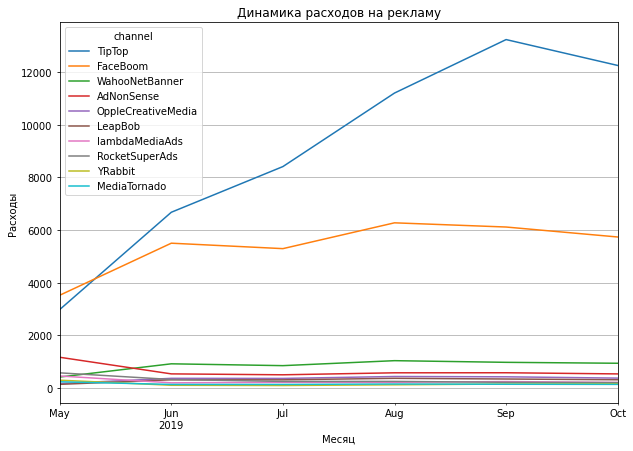

In [27]:
cost_per_month.transpose().plot(figsize=(10,7), grid=True)

plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Динамика расходов на рекламу');

Сделаем срез, из которого убрем выбивающиеся каналы TipTop и FaceBoom:

In [28]:
profiles_query = profiles[(profiles['channel'] != 'TipTop')&(profiles['channel'] != 'FaceBoom')]

cost_per_month_query = profiles_query.pivot_table(
    index='channel', columns='month', values='acquisition_cost', aggfunc='sum'
).sort_values(by='2019-10-01', ascending=False)
cost_per_month_query

month,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
channel,,,,,,
WahooNetBanner,418.80,921.000,851.40,1040.40,977.40,942.000
AdNonSense,1169.70,538.650,504.00,579.60,581.70,537.600
OppleCreativeMedia,169.75,370.000,366.50,439.25,427.75,378.000
LeapBob,140.28,314.580,313.53,369.81,343.98,315.420
lambdaMediaAds,458.40,199.200,219.20,220.00,247.20,213.600
RocketSuperAds,577.98,325.715,252.07,253.11,218.40,205.725
YRabbit,299.70,106.200,97.38,124.74,152.79,163.410
MediaTornado,238.56,138.000,138.48,154.56,144.72,140.160


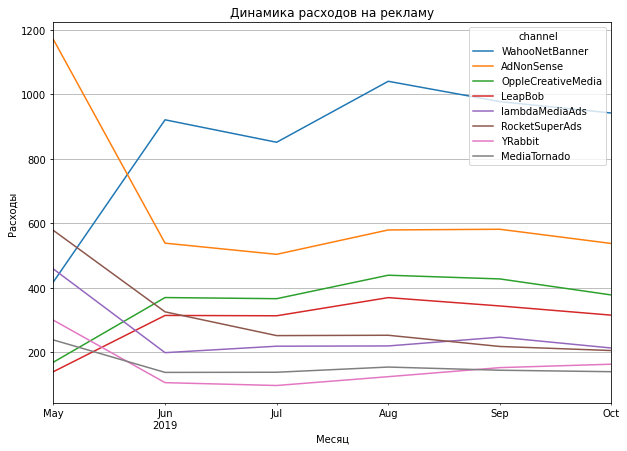

In [29]:
cost_per_month_query.transpose().plot(figsize=(10,7), grid=True)

plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Динамика расходов на рекламу');

Видно, что инвестиции в канал AdNoneSense в первый месяц рассматриваемого периода резко снизились. Далее держались стабильно до конца периода. У канала WahooNetBanner обратная ситуация: расходы на канал активно увеличивались. Наименьшего вложения получили каналы YRabbit и MediaTornado. Как раз это изменение и стало причиной изменения стоимости привлечения пользователей в европейских странах.

Большая часть бюджета ушла на каналы TipTop и FaceBoom.
Затраты на рекламу в TipTop активно увеличивались каждый месяц. Пик пришелся на сентябрь.
Динамика изменения затрат на FaceBoom более стабильна. Небольшое снижение началось с августа.

### 4.2 Рассчет CAC  <a id="4.2id"></a>

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.

In [30]:
cac_per_channel = (
     profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
     .sort_values(by='acquisition_cost', ascending=False)
     .round(2)
).reset_index()

cac_per_channel.columns = ['Канал привлечения', 'Стоимость привлечения']

cac_per_channel

,Канал привлечения,Стоимость привлечения
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


In [31]:
# средний CAC на одного пользователя для всего проекта

print(profiles['acquisition_cost'].mean())

1.1274813239427588


Сводная таблица также показывает, что самое дорогое привлечение одного пользователя происходит по каналам TipTop, FaceBoom и AdNonSense.

### 5. Оценка окупаемости рекламы <a id="2id"></a>

### 5.1 Общая окупаемость рекламы

Установим момент и горизонт анализа данных. Рассчитаем и визуализируем LTV и ROI

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

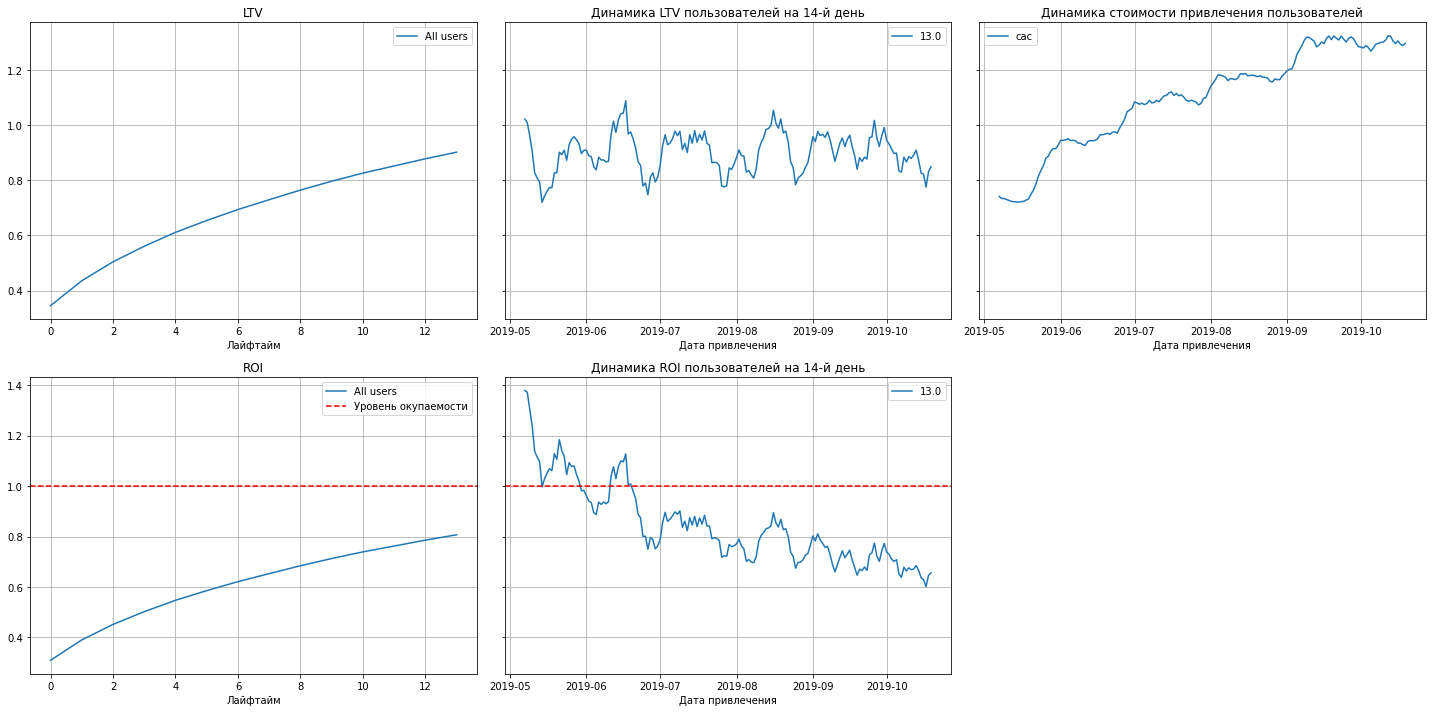

In [33]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Выводы по графикам:

- реклама не окупается. К концу второй недели доходит чуть больше 80%
- LTV достаточно стабильна
- аномальная динамика стоимости привлечения: большими скачками растет с каждым месяцем. Вероятно, из-за увеличения расходов на рекламу
- динамика окупаемости инвестиций, соответственно, снижается с каждым месяцем. После середины июня динамика все время отрицательна

Попробуем выяснить, почему падает окупаемость. Для это рассмотрим окупаемость в разбивке по рекламным каналам, странам и девайсам.

### 5.2 Oкупаемость рекламы с разбивкой по рекламным каналам

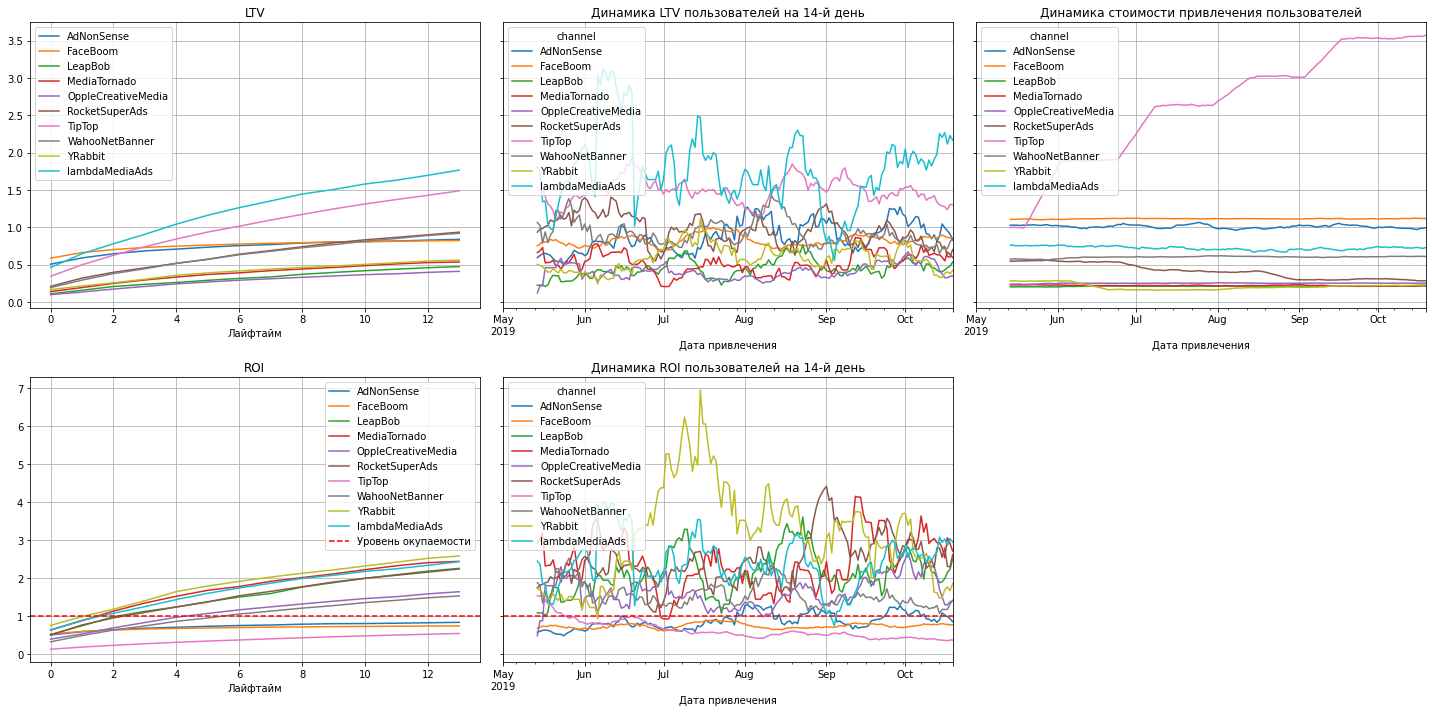

In [34]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы по графикам:

- не окупаются за 14 день реклама на каналах TipTop, FaceBoom и AdNonSense
- стоимость привлечения TipTop резко растет. У остальных каналов стабильна
- лучше всего окупается YRabbit

Взглянем чуть ближе на три канала, которые не окупаются.

In [35]:
profiles_tfa = (
    profiles[(profiles['channel'] == 'TipTop') 
                        |(profiles['channel'] == 'FaceBoom')
                        |(profiles['channel'] == 'AdNonSense')]
)

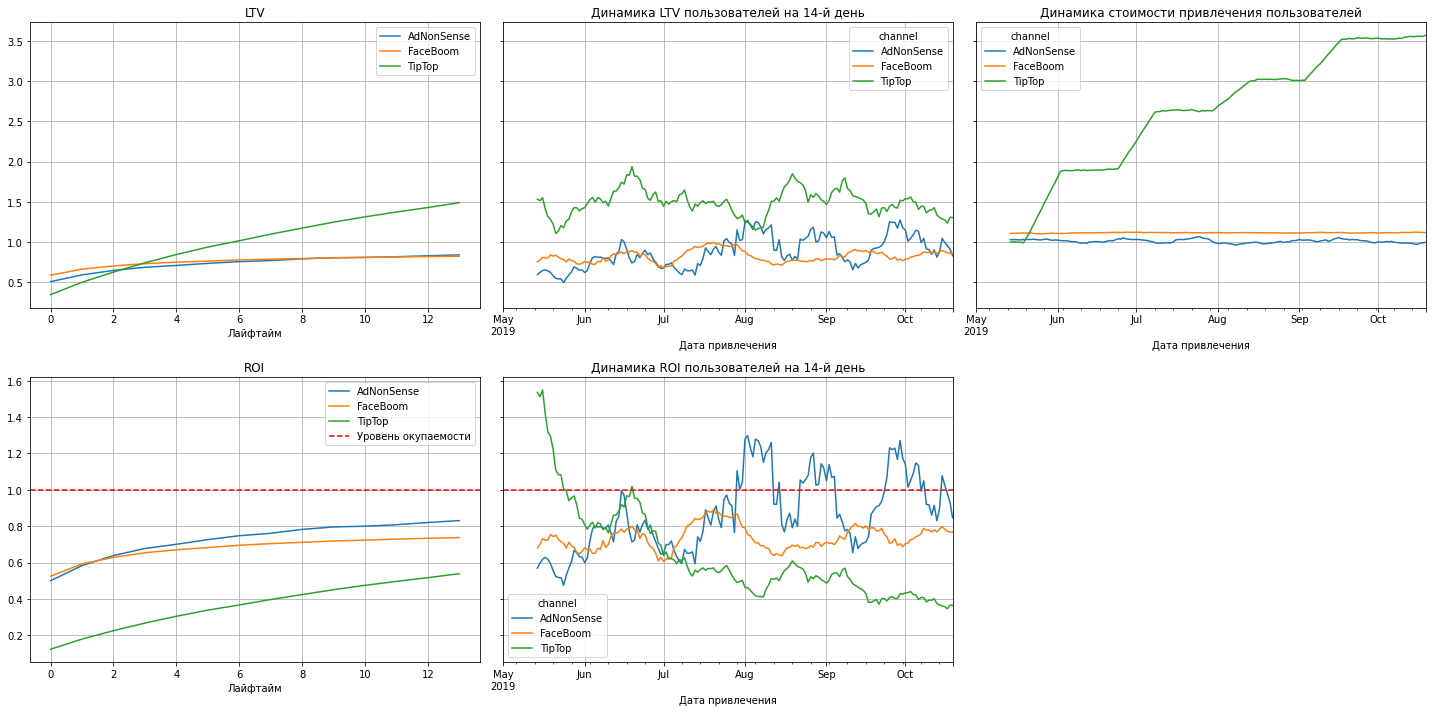

In [36]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_tfa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика стоимости привлечения у AdNonSense и FaceBoom одинаковая. А вот у TipTop резко возрастает при том, что динамика LTV у всех стабильна.

`ROI = LTV / CAC`

Это означает, что компания тратит все больше средств на канал TipTop, однако, пользователи не приносят больше прибыли. Соответственно, окупаемость со временем только падает.

### 5.3 Окупаемость рекламы с разбивкой по странам

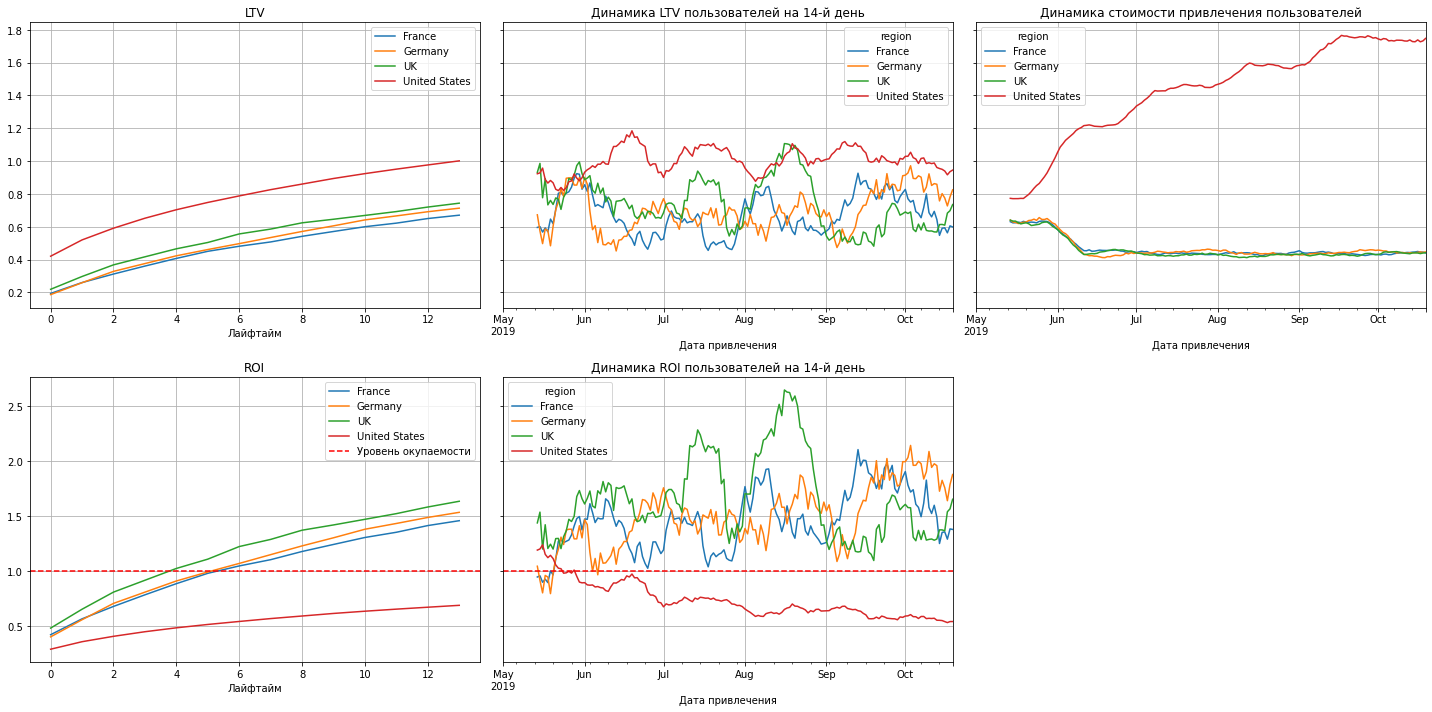

In [37]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы по графикам:

- реклама окупается  во всех странах кроме США
- динамика стоимости привлечения сильно отличается: с середины мая у США идет активный рост, у остальных стран, наоборот, немного снижается и с середины июня идет стабильно
- LTV подвержен сезонности

### 5.4 Окупаемость рекламы с разбивкой по устройствам

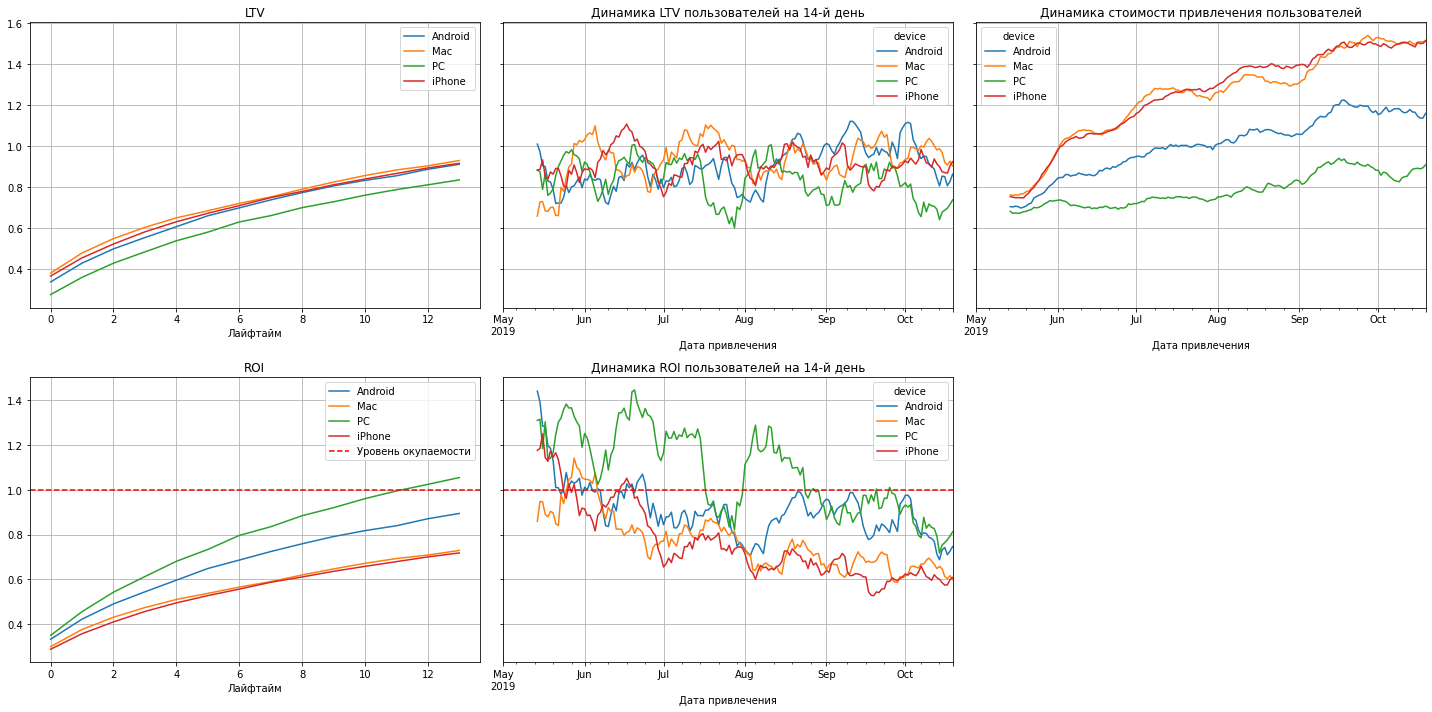

In [38]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы по графикам:

- LTV все так же стабильна
- в динамике стоимость привлечения пользователей выше у IPhone и Mac. Постепенно показатель растет по всем устройствам 
- окупаются только пользователи, использующие PC

### 5.5 Анализ конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

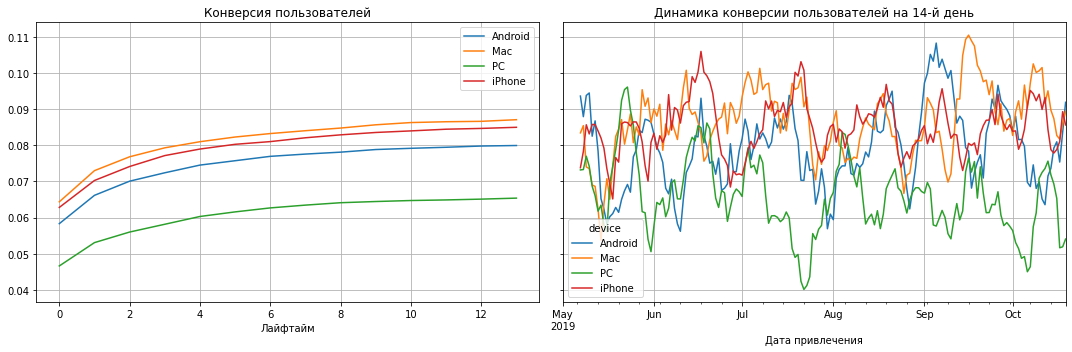

In [39]:
# конверсия с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у пользователей iPhone, Mac и Android почти на одном уровне. Ниже показатели конверсии у пользователей PC

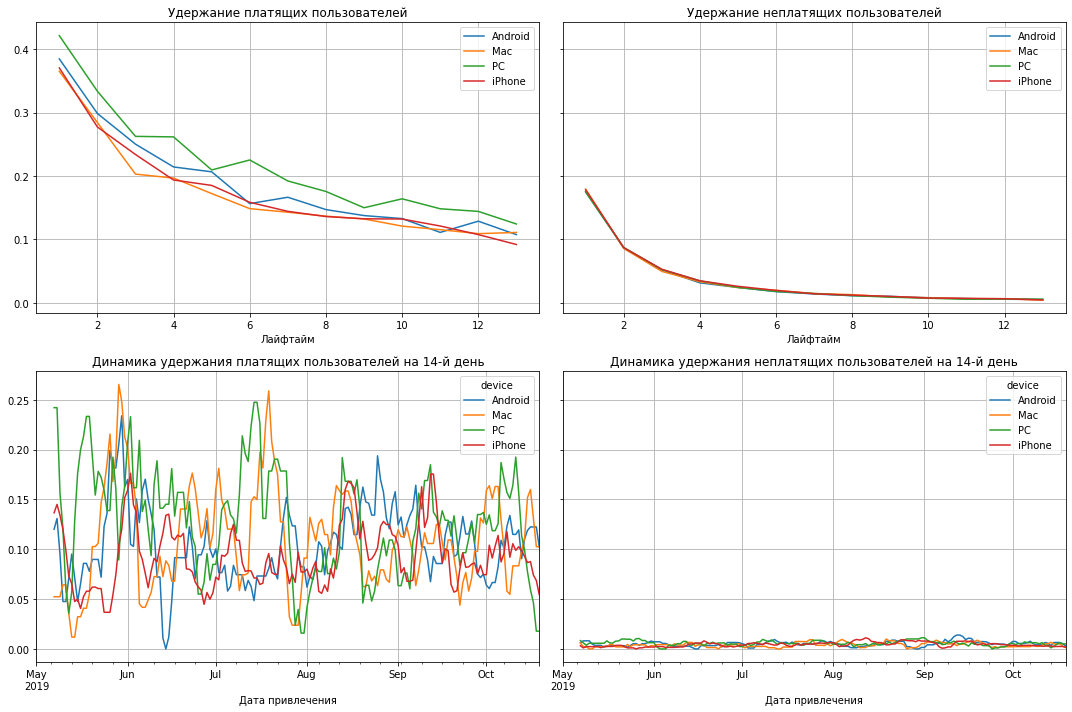

In [40]:
# удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Можно заметить, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается. Вероятно, это связано с тем, что мало наблюдений, и каждое отдельное наблюдение существенно влияет на оценку.

В удержании по устройствам все достаточно стабильно. Чуть лучше остальных удерживаются пользователи PC.

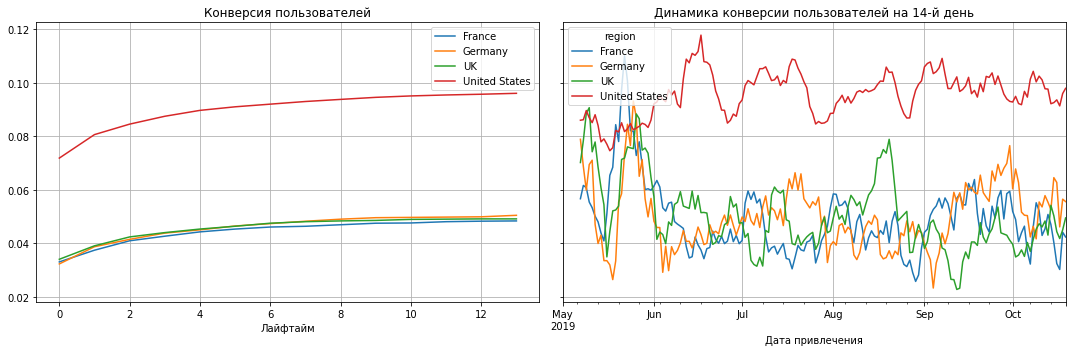

In [41]:
# конверсия с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей в США сильно выше конверсии в остальных регионах. В середине июня конверсия пользователей Германии, Великобритании и Франции резко взлетела и даже превзошла показатели США. После так же резко упала и оставшийся период держалась достаточно стабильно.

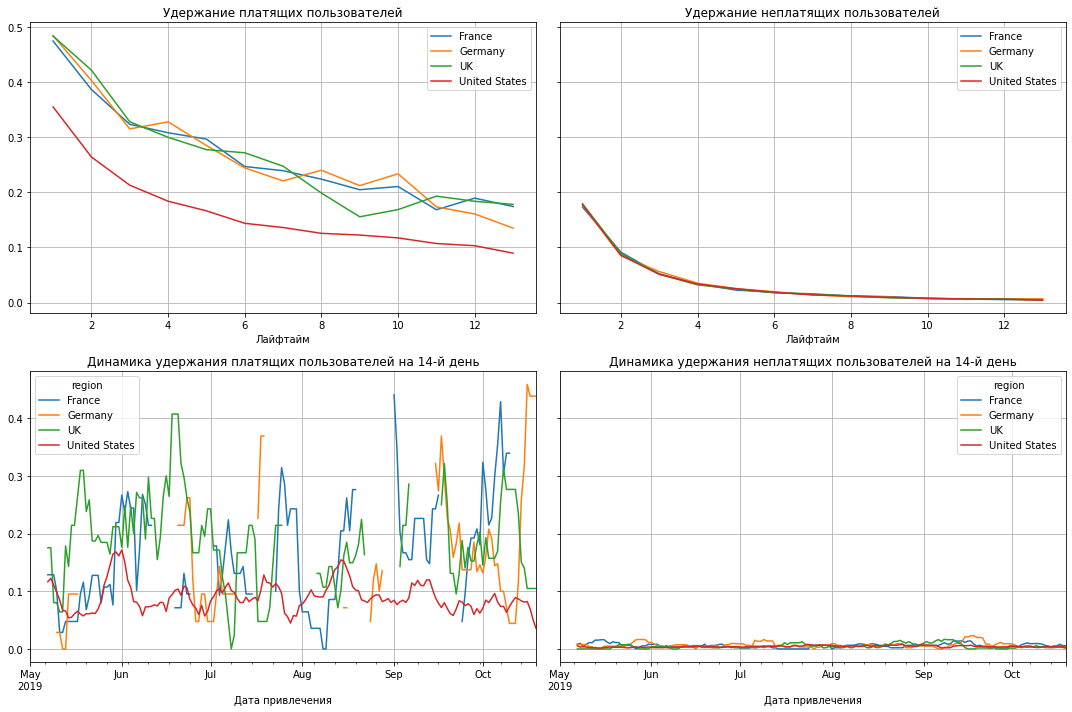

In [42]:
# удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих американских пользователей ниже, чем в других странах.

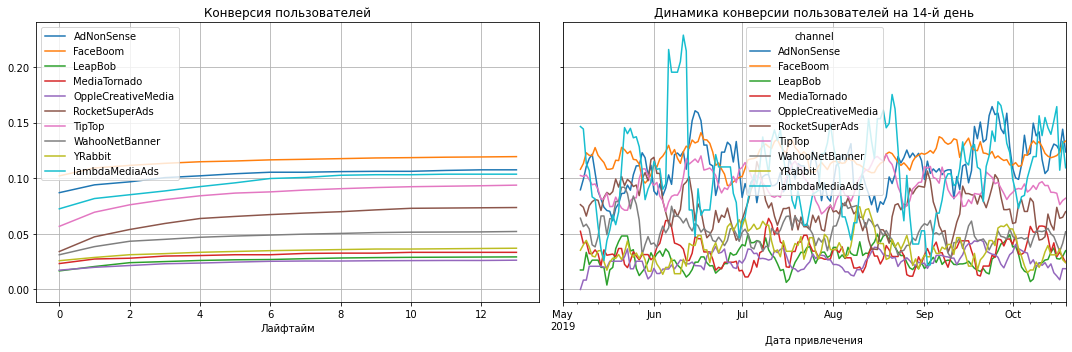

In [43]:
# конверсия с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая высокая конверсия пользователей идет с канала FaceBoom. Динамика конверсии показывает, что в лидеры несколько раз выбивался канал lambdaMediaAds.

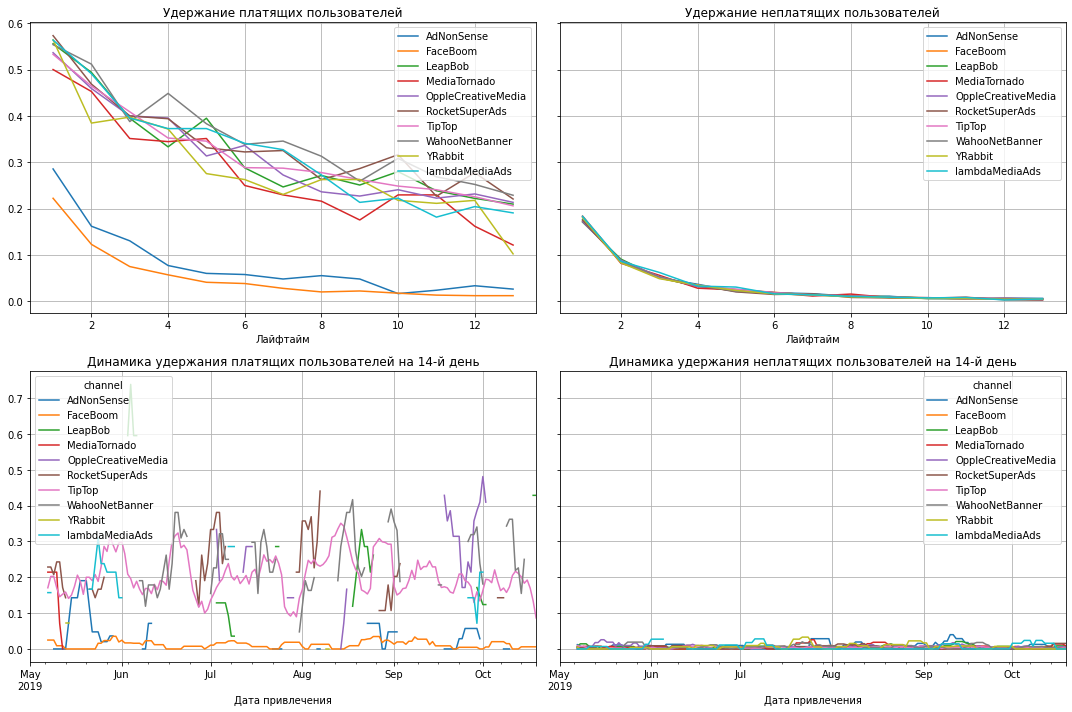

In [44]:
# удержание с разбивкой по канналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи с каналов AdNonSense и FaceBoom удерживаются хуже, чем у остальных каналов.
TipTop удерживает пользователей достаточно хорошо.

### Выводы

- в целом реклама приложения не окупается
- показатели США сильно снижают общую окупаемость
- средства, затраченные на каналы FaceBoom, AdNonSense и TipTop не окупаются
- не окупаются пользователи Android, Mac, iPhone
    
**Чем могут быть вызваны проблемы окупаемости?**
- незнание маркетинговых показателей
- непонимание целевой аудитории
- некорректно выбраны рекламные площадки



Компании стоит обратить внимание на свои бизнес-показатели, поиски причин, которые на них влияют, а также способы их улучшения. Возможно, стоит глубже изучить свою целевую аудиторию, включить в анализ дополнительные пользовательские метрики. А также с большей подготовкой подойти к выбору рекламных площадок для своего товара.

### 6. Выводы

### 6.1 Причины неэффективности привлечения пользователей

**1). Вложение бюджета в неокупаемые каналы в США**

Ниже убедимся, что в США и Европе используются разные каналы привлечения пользователей. 
Значительный объем денежных средств рекламного бюджета был распределен на каналы TipTop и FaceBoom. Они же являются самыми убыточными каналами

In [45]:
profiles[profiles['region'] == 'United States']['channel'].unique()

array(['FaceBoom', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'TipTop'],
      dtype=object)

In [46]:
profiles[profiles['region'] == 'Germany']['channel'].unique()

array(['AdNonSense', 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia',
       'lambdaMediaAds'], dtype=object)

In [47]:
profiles[profiles['region'] == 'France']['channel'].unique()

array(['AdNonSense', 'WahooNetBanner', 'OppleCreativeMedia', 'LeapBob',
       'lambdaMediaAds'], dtype=object)

In [48]:
profiles[profiles['region'] == 'UK']['channel'].unique()

array(['WahooNetBanner', 'LeapBob', 'lambdaMediaAds',
       'OppleCreativeMedia', 'AdNonSense'], dtype=object)

In [49]:
profiles.groupby(['region', 'channel'])['acquisition_cost'].sum()

region         channel           
France         AdNonSense             1376.316788
               LeapBob                 628.045578
               OppleCreativeMedia      747.336327
               WahooNetBanner         1789.137006
               lambdaMediaAds          535.138248
Germany        AdNonSense             1229.282545
               LeapBob                 529.946557
               OppleCreativeMedia      640.733464
               WahooNetBanner         1552.972718
               lambdaMediaAds          471.287952
UK             AdNonSense             1305.650668
               LeapBob                 639.607864
               OppleCreativeMedia      763.180209
               WahooNetBanner         1808.890277
               lambdaMediaAds          551.173800
United States  FaceBoom              32445.600000
               MediaTornado            954.480000
               RocketSuperAds         1833.000000
               TipTop                54751.300000
               Y

Рассмотрим отдельно США и Европу.

In [50]:
# окупаемость в США

profiles_usa = profiles[profiles['region'] == 'United States']

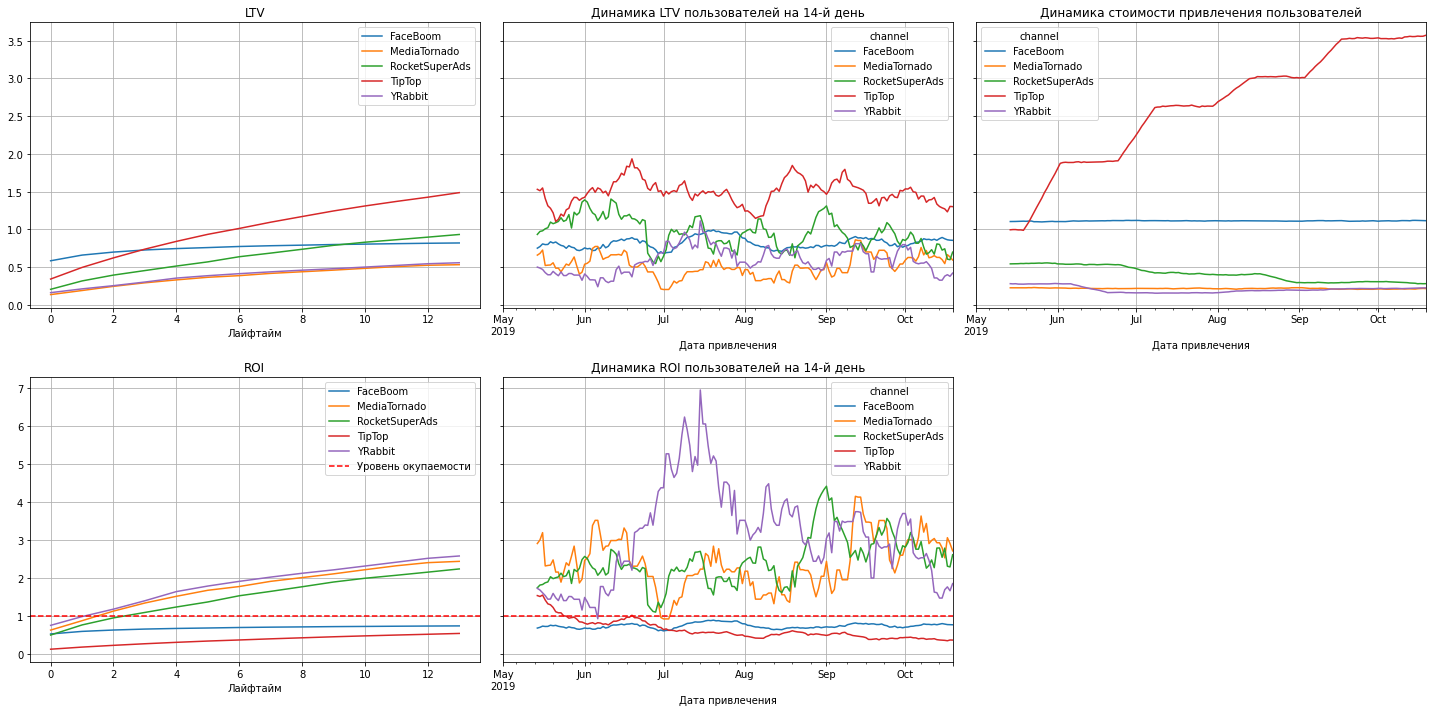

In [51]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Лучше всего окупается YRabbit. Не окупаются два канала: FaceBoom и TipTop. Выбросим их из таблицы

In [52]:
profiles_usa_part = profiles_usa[(profiles_usa['channel'] != 'FaceBoom') & (profiles_usa['channel'] != 'TipTop')]

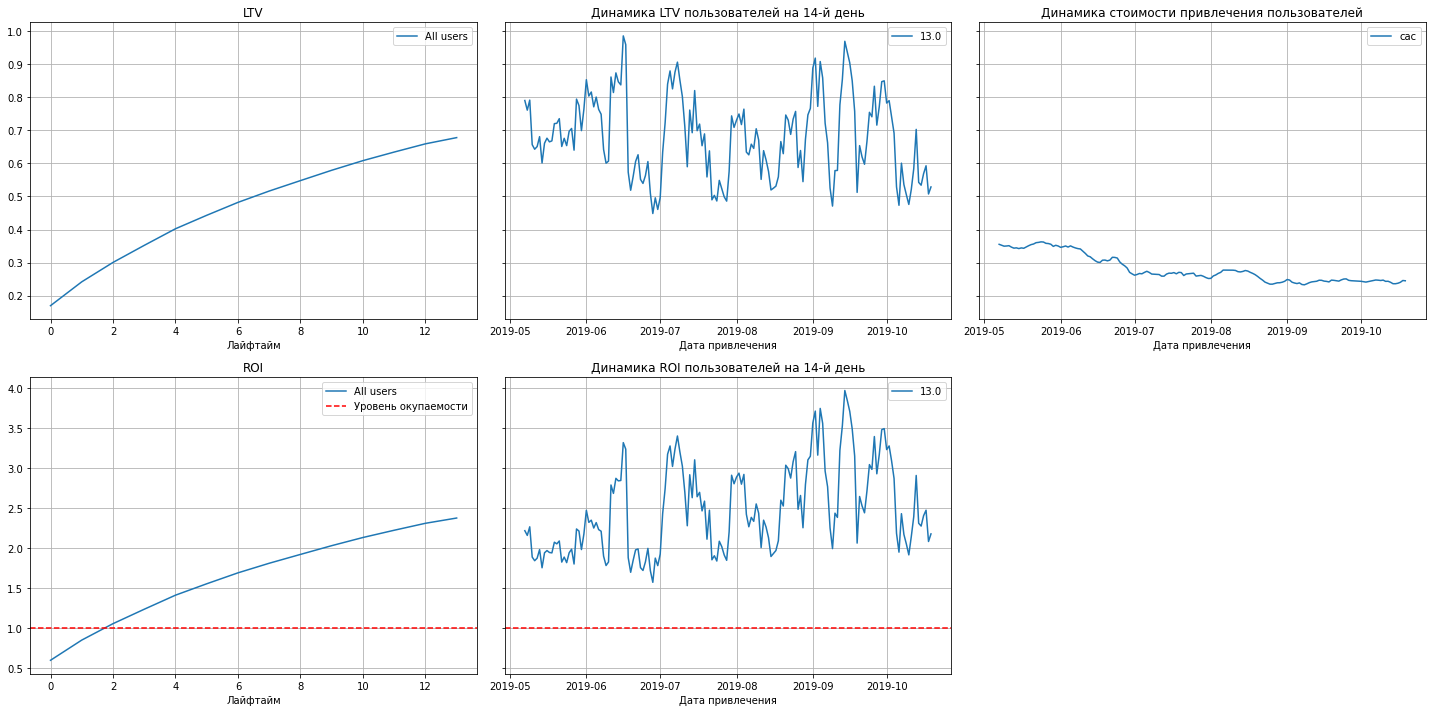

In [53]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa_part, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вот теперь инвестиции окупаются уже на второй день. 

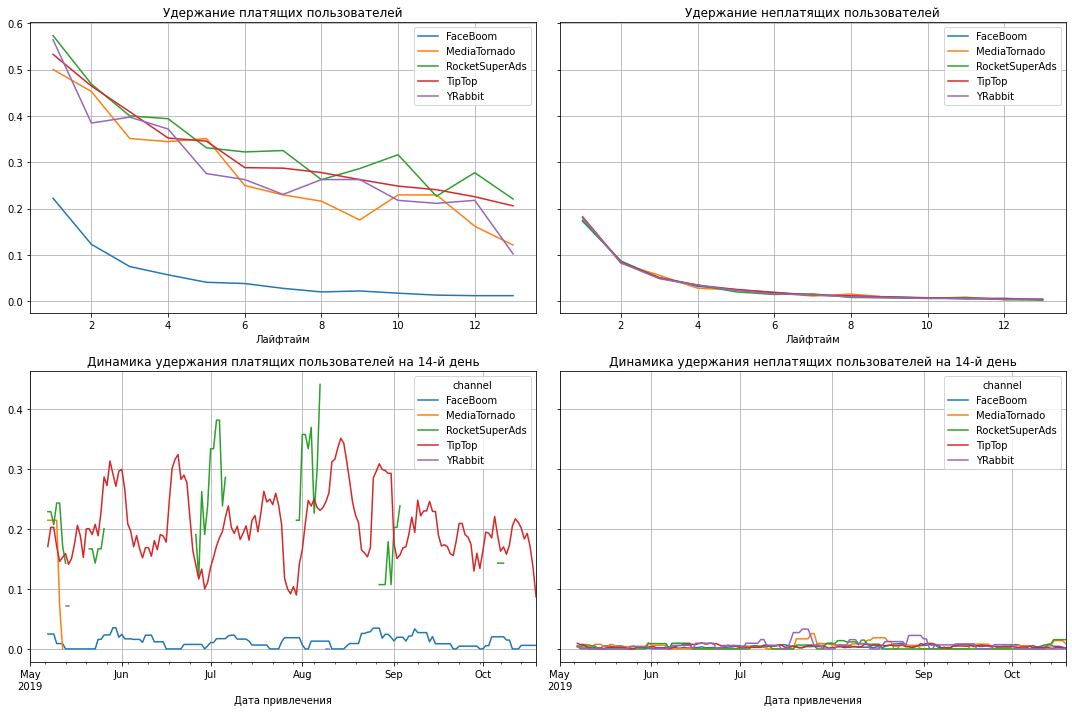

In [54]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не прекращают пользоваться приложением пользователи с канала TipTop. Хуже всего удерживаются пользователи с каналов MediaTornado и YRabbit.
Посчитаем конверсию по каналам.

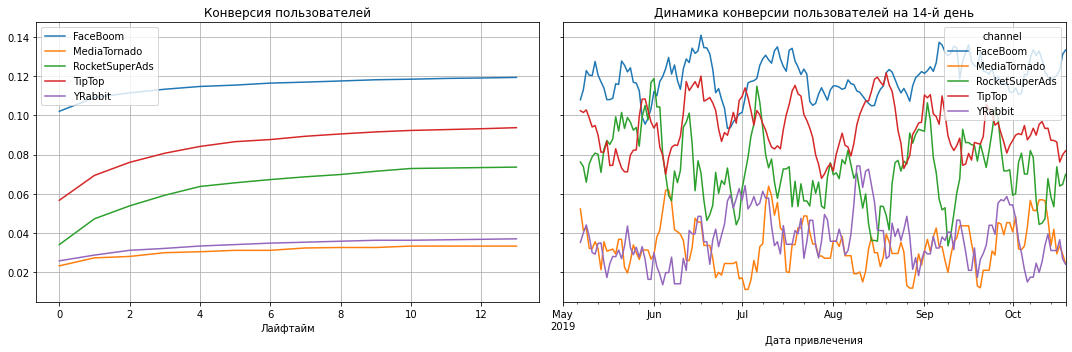

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

При том, что у пользователей канала Faceboom самая низкое удержание, конверсия в платящих самая высокая по всем американским каналам. Ниже всего конверсия у YRabbit и MediaTornado.

Проверим окупаемость в Европе.

In [56]:
# оценка окупаемости в Европе

profiles_eu = profiles[profiles['region'] != 'United States']

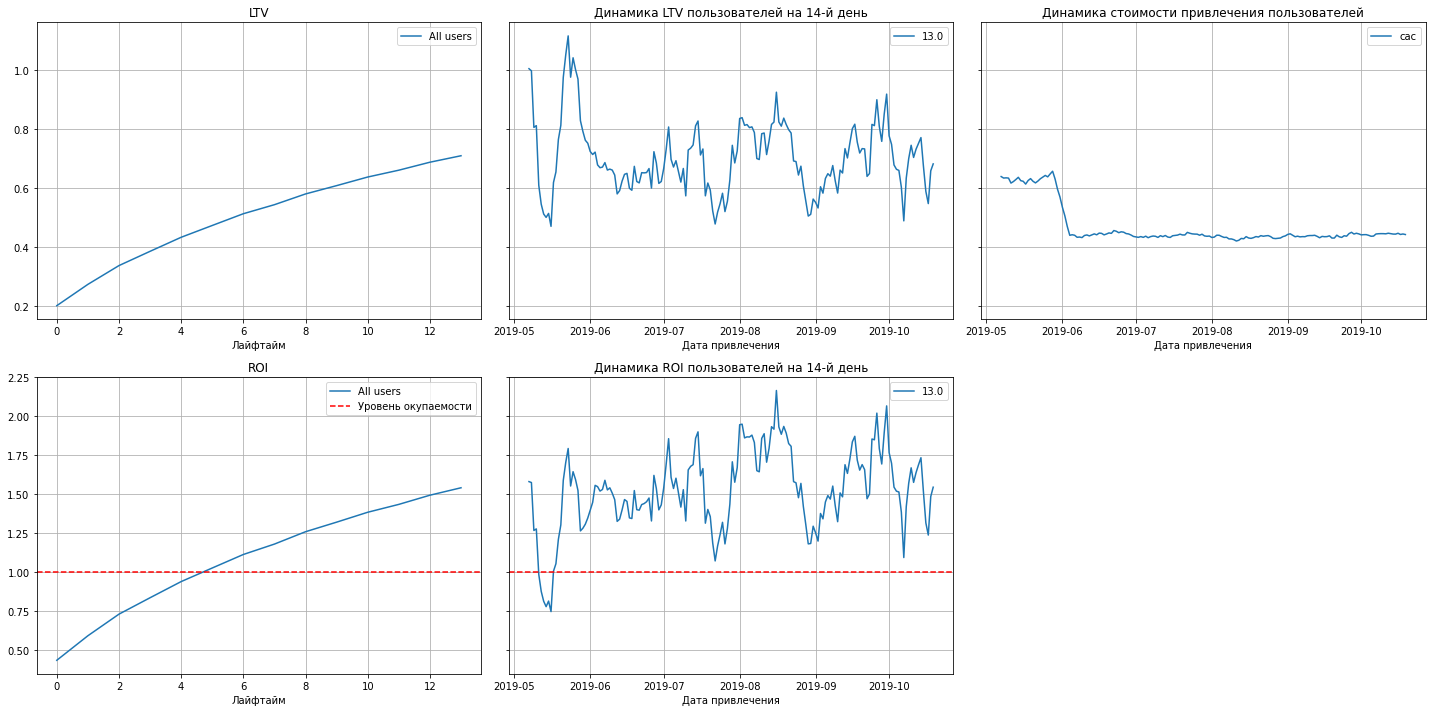

In [57]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Как видим на графиках, Европейский регион окупается уже на пятый день. Значит здесь не стоит проблема в выборе каналов привлечения. Однако в регионе все же есть аутсайдер, который не окупает своих вложений. Это канал AdNoneSense.

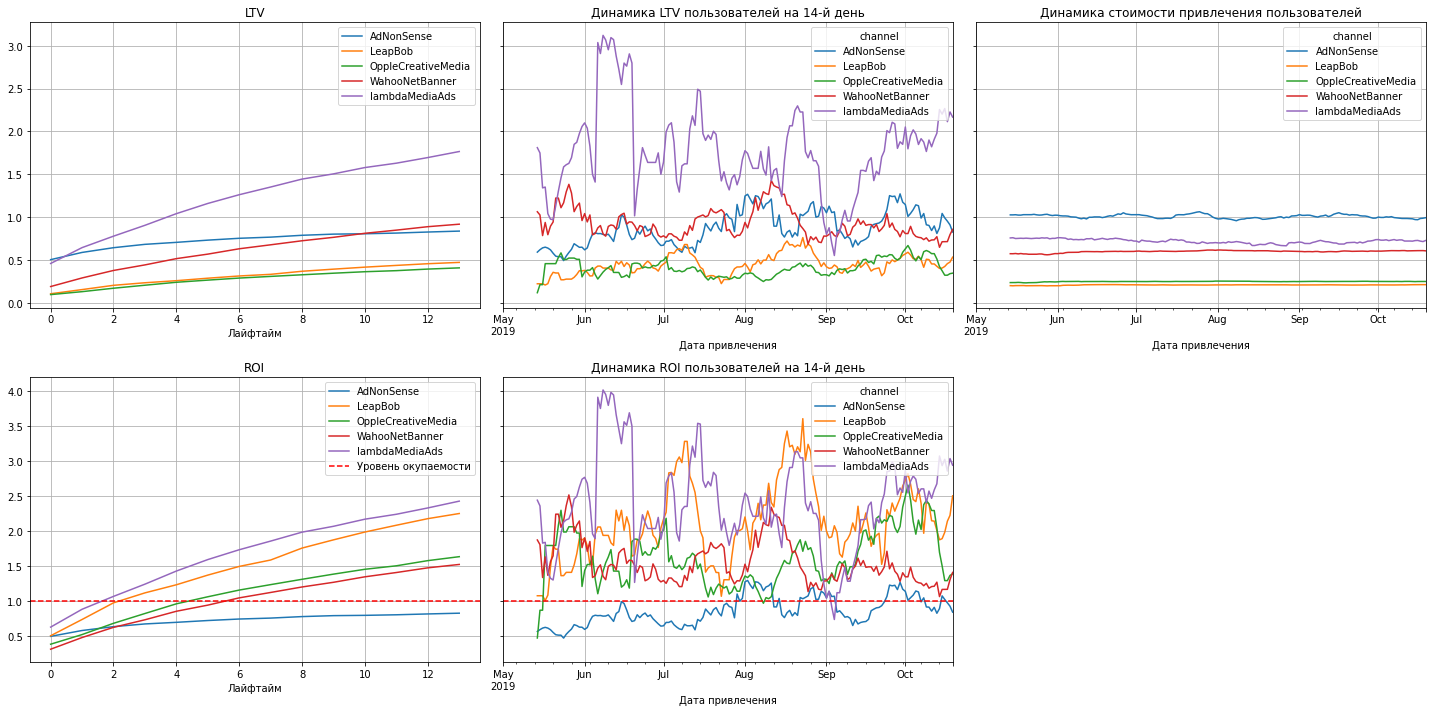

In [58]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**2). Очень высокая стоимость привлечения клиентов в США**

Самая высокая CAC у приложений TipTop (2.80), FaceBoom (1.11) и AdNonSense (1.01).
Именно эти каналы не окупают вложенные в них инвестиции в Европе и США. Необходимо искать пути снижения стоимости привлечения. Возможно, решением будет сосредоточение на более эффективных каналах продвижения.

**3). Низкая конверсия и удержание бесплатных пользователей**

Больше всего пользователей приходят из неплатных каналов (organic). Но и доля платящих из этого объема самая маленька по всем каналам. 

### 6.2 Рекомендации для отдела маркетинга

1. Снизить расходы на рекламу для каналов TipTop(США), FaceBoom(США) и AdNonSense(Европа). При стабильном LVT не стоит увеличивать объем инвестиций, так как это действие приведет к снижению окупаемости;
2. Увеличивать конверсию и удержание бесплатных пользователей с канала organic, откуда приходит самое большое количество пользователей;
3. Увеличить финансирование европейского канала lambdaMediaAds, привлекать через него больше клиентов. CAC канала стабилен, а LTV растет активнее остальных. Соотвественно, окупаемость будет высокой. Новые приходящие пользователи будут приносить еще большую прибыль.
4. Увеличить финансирование американского канала RocketSuperAds, который окупается на второй день. К четырнадцатому дню у канала самый большой показатель LTV и один из самых низких CAC.
5. Увеличить конверсию пользователей, заходящих в приложение через ПК, при сохранении прежнего уровня удержания
6. Повышать удержание пользователей IPhone и Mac. У них достаточно высокая конверсия и наибольшая доля платящих пользователей. 